In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
def flood_simulation(intensity, duration, drainage, absorption):
    total_rain = intensity * duration
    drained = drainage * duration
    absorbed = total_rain * (absorption / 100)

    flood_water = total_rain - (drained + absorbed)
    flood_water = max(flood_water, 0)

    flood_depth = flood_water * 0.1
    return flood_depth


In [3]:
np.random.seed(42)
data = []

for _ in range(1000):
    intensity = np.random.uniform(10, 150)
    duration = np.random.uniform(0.5, 6)
    drainage = np.random.uniform(20, 100)
    absorption = np.random.uniform(5, 40)

    flood_depth = flood_simulation(intensity, duration, drainage, absorption)

    data.append([
        intensity, duration, drainage, absorption, flood_depth
    ])

df = pd.DataFrame(data, columns=[
    "rain_intensity", "rain_duration",
    "drainage_capacity", "soil_absorption",
    "flood_depth"
])


In [4]:
df.describe()


,rain_intensity,rain_duration,drainage_capacity,soil_absorption,flood_depth
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,80.565174,3.237816,58.770347,22.626126,5.916619
std,40.797142,1.590064,23.587258,10.012013,8.964895
min,10.018857,0.510957,20.000931,5.051584,0.000000
25%,45.911864,1.870313,37.445800,14.048435,0.000000
50%,81.663935,3.240754,58.957372,22.593032,0.987998
75%,116.525229,4.557135,78.715234,31.378428,9.034517
max,149.917922,5.997567,99.911409,39.990119,61.351306


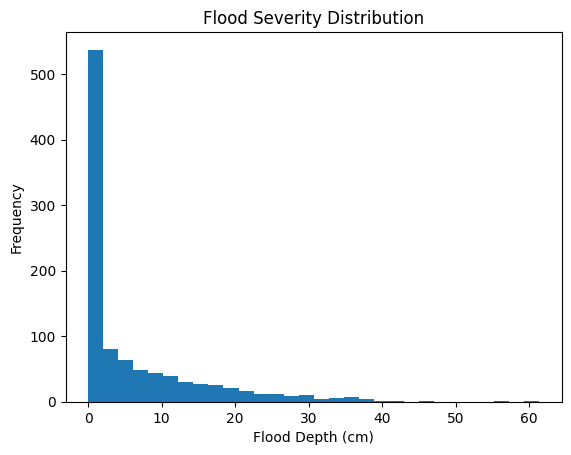

In [5]:
plt.hist(df["flood_depth"], bins=30)
plt.xlabel("Flood Depth (cm)")
plt.ylabel("Frequency")
plt.title("Flood Severity Distribution")
plt.show()


In [6]:
from sklearn.model_selection import train_test_split

X = df.drop("flood_depth", axis=1)
y = df["flood_depth"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import math

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mse = mean_squared_error(y_test, preds)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_test, preds)

    results.append([name, mse, rmse, r2])

results_df = pd.DataFrame(
    results, columns=["Model", "MSE", "RMSE", "R2"]
)
